# Loan - Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Run the 'Loan-Data_preparation' file

In [23]:
%run Loan-Data_preparation.ipynb

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001003    Male     Yes          1      Graduate            No   
1    LP001005    Male     Yes          0      Graduate           Yes   
2    LP001006    Male     Yes          0  Not Graduate            No   
3    LP001008    Male      No          0      Graduate            No   
4    LP001011    Male     Yes          2      Graduate           Yes   
..        ...     ...     ...        ...           ...           ...   
524  LP002978  Female      No          0      Graduate            No   
525  LP002979    Male     Yes         3+      Graduate            No   
526  LP002983    Male     Yes          1      Graduate            No   
527  LP002984    Male     Yes          2      Graduate            No   
528  LP002990  Female      No          0      Graduate           Yes   

     Applicant_Income  Coapplicant_Income  Loan_Amount  Loan_Amount_Term  \
0                4583              1508.0          128     

# Transform on 'x_test'

In [24]:
# Transform the x_test dataset using thepipeline
x_test = pipe.transform(x_test)

# Check the transformed x_test data
x_test

,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_Female,Married_Yes,Married_No,Dependents,Education,Self_Employed,Property_Area
160,0.058565,0.000000,0.053173,0.729730,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
143,0.638380,0.000000,1.171527,0.594595,1.0,0.0,0.0,1.0,0.0,3.0,1.0,1.0,2.0
318,0.113457,0.232674,0.622642,0.594595,1.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0
53,0.049672,0.000000,0.169811,0.729730,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
275,0.183673,0.000000,0.485420,0.729730,1.0,1.0,0.0,1.0,0.0,3.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,0.066568,0.137364,0.248714,0.729730,1.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0
425,0.030303,0.050241,0.154374,0.729730,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
518,0.068683,0.000000,0.190395,0.729730,1.0,1.0,0.0,1.0,0.0,3.0,1.0,1.0,2.0
391,0.044007,0.075923,0.267581,0.729730,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0


# Build and Train the Logistic Regression model

In [25]:
# Initialize the Logistic Regression model with a maximum iteration of 600
logreg_model = LogisticRegression(max_iter=600)

In [26]:
# Train the model on the x_train and y_train datasets
logreg_model.fit(x_train, y_train)

LogisticRegression(max_iter=600)

# Intercept (b0) and coefficients (bn)

In [27]:
# Calculate the model's accuracy score
train_accuracy = logreg_model.score(x_test, y_test)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

Training Accuracy: 80.19%


In [28]:
# Get the model's intercept
intercept = logreg_model.intercept_[0]
print(f"Intercept: {intercept:.4f}")

# Get the model's coefficients
coefficients = logreg_model.coef_[0]
print(f"Coefficients: {coefficients}")

Intercept: -2.0967
Coefficients: [-0.06834829 -0.59437365 -0.44205059 -0.61957103  3.1657086   0.47183266
  0.46201     0.12077715 -0.45746497  0.02532999  0.4520807  -0.07182456
  0.15782301]


# Equation of the Logistic Regression model

In [29]:
# Display the equation of the Logistic Regression model
bn_xn = ''

for i in range( len(coefficients) ):
    bn_xn += f' + {round(coefficients[i], 2)} + x{i + 1}'

z = f'{round(intercept, 2)}{bn_xn}'
print(f'The regression equation is:')
print('1')
print('------------------------------------------------------------------------------------------------------------------------')
print(f'1 + e ^ -( {z} )')

The regression equation is:
1
------------------------------------------------------------------------------------------------------------------------
1 + e ^ -( -2.1 + -0.07 + x1 + -0.59 + x2 + -0.44 + x3 + -0.62 + x4 + 3.17 + x5 + 0.47 + x6 + 0.46 + x7 + 0.12 + x8 + -0.46 + x9 + 0.03 + x10 + 0.45 + x11 + -0.07 + x12 + 0.16 + x13 )


# Prediction on the x_test dataset

In [30]:
# Make predictions on the x_test dataset
y_pred = logreg_model.predict(x_test)
y_pred.round(2)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int16)

# Predictions on the "x_test" dataset ("y_pred"), and plot "y_test" against "y_pred" and "y_pred" against itself in two scatter plots

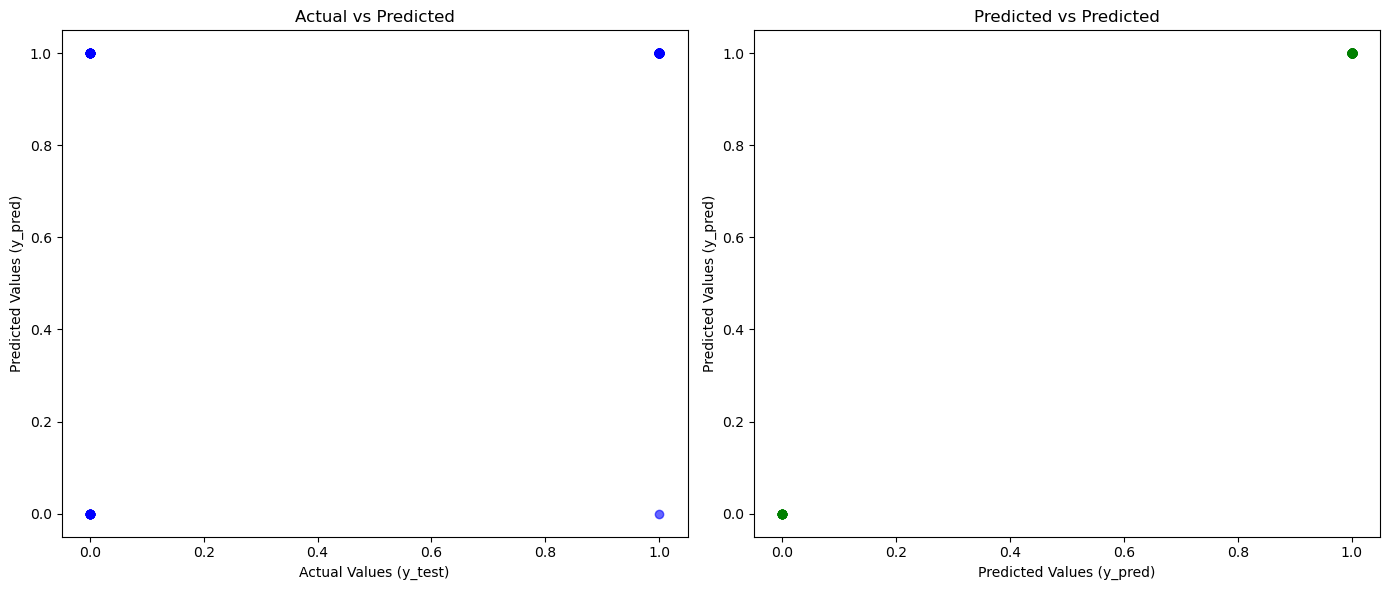

In [31]:
# Create a figure and axis for the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot of y_test vs. y_pred
ax1.scatter(y_test, y_pred, color='blue', alpha=0.6)
ax1.set_xlabel('Actual Values (y_test)')
ax1.set_ylabel('Predicted Values (y_pred)')
ax1.set_title('Actual vs Predicted')

# Scatter plot of y_pred vs. y_pred (self-comparison)
ax2.scatter(y_pred, y_pred, color='green', alpha=0.6)
ax2.set_xlabel('Predicted Values (y_pred)')
ax2.set_ylabel('Predicted Values (y_pred)')
ax2.set_title('Predicted vs Predicted')

# Show the plots
plt.tight_layout()
plt.show()

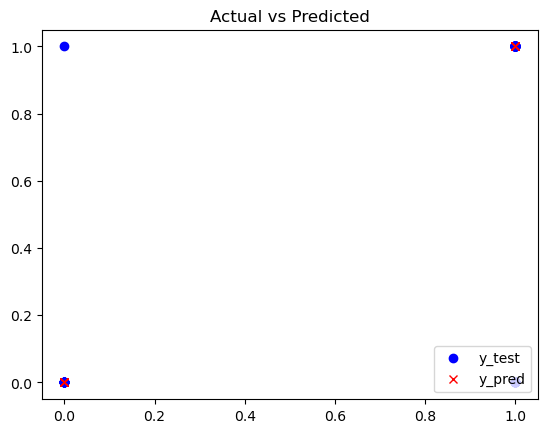

In [32]:
plt.figure()
plt.plot(y_pred, y_test, 'bo')
plt.plot(y_pred, y_pred, 'rx')

plt.title('Actual vs Predicted')
plt.legend(['y_test', 'y_pred'], loc = 'lower right')
plt.show()

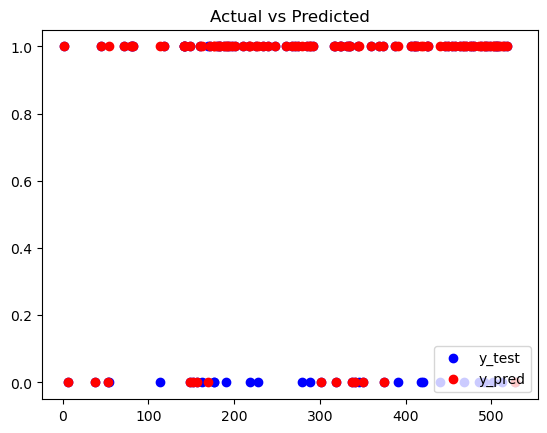

In [33]:
plt.figure()
plt.plot(y_test.index, y_test, 'bo')
plt.plot(y_test.index, y_pred, 'ro')

plt.title('Actual vs Predicted')
plt.legend(['y_test', 'y_pred'], loc = 'lower right')
plt.show()

In [34]:
# Calculate root mean squared error (RMSE) between "y_test"and "y_pred"
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.4450990985692622


# Create new DataFrame

In [35]:
new_data = pd.DataFrame({
    "Gender": ["Female"],
    "Married": ["No"],
    "Dependents": ["0"],
    "Education": ["Not Graduate"],
    "Self_Employed": ["Yes"],
    "Applicant_Income": [18165],
    "Coapplicant_Income": [0.0],
    "Loan_Amount": [125],
    "Loan_Amount_Term": [360],
    "Credit_History": [1],
    "Property_Area": ["Urban"]
})

print(new_data)

   Gender Married Dependents     Education Self_Employed  Applicant_Income  \
0  Female      No          0  Not Graduate           Yes             18165   

   Coapplicant_Income  Loan_Amount  Loan_Amount_Term  Credit_History  \
0                 0.0          125               360               1   

  Property_Area  
0         Urban  


# Transform new data using the pipeline and predict on it

In [36]:
x_new = pipe.transform(new_data)
x_new

,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_Female,Married_Yes,Married_No,Dependents,Education,Self_Employed,Property_Area
0,0.22282,0.0,0.185249,0.72973,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0


In [37]:
# Make predictions on the new dataset
loan_approval_prediction = logreg_model.predict(x_new)
loan_approval_prediction

array([1], dtype=int16)

# Make predict and double-check

In [38]:
# Create sigmoid func
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [39]:
x_new = np.array(x_new)

In [40]:
# Calculating the probability of approval using sigmoid function
for x in x_new:
    z = intercept

    for i in range( len(x) ):
        z += coefficients[i] * x[i]

    probability = round(sigmoid(z), 2)
    print(f'Probability: {probability}')

Probability: 0.7


In [41]:
print(f'According to the model, the loan is approved: ({loan_approval_prediction}), but the probability is {probability * 100}%')

According to the model, the loan is approved: ([1]), but the probability is 70.0%
